# HW2 option2


In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image as Image
import scipy
import scipy.misc
import scipy.cluster

Import three similar images to analyize:

In [15]:
im1 = Image.open("1.jpeg")
im2 = Image.open("2.jpeg")
im3 = Image.open("3.jpeg")

preview the targeted three images:

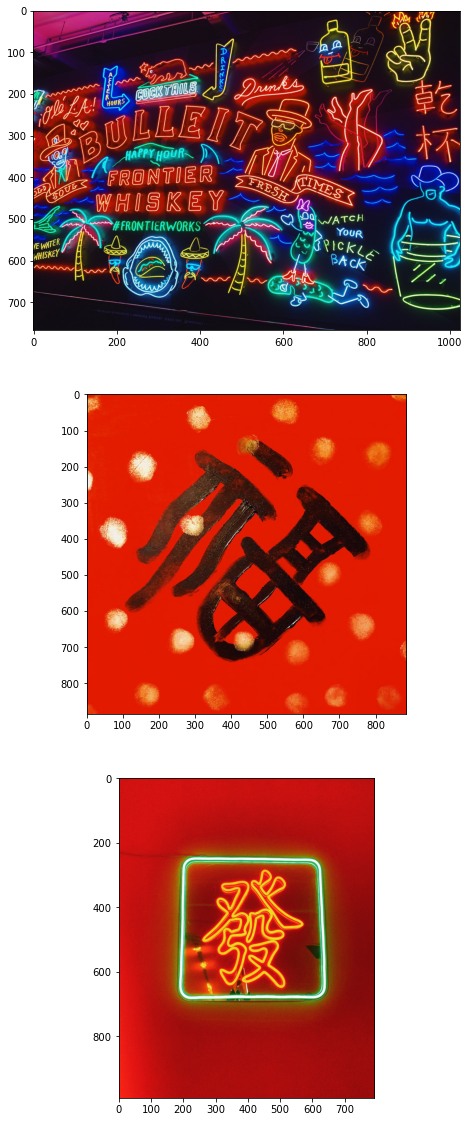

In [51]:
f, axarr = plt.subplots(3,1,figsize=(16,20)) 
axarr[0].imshow(im1)
axarr[1].imshow(im2)
axarr[2].imshow(im3)

#### Acknowledgement: 
The following functions are from the starter code provided for this homework.

In [42]:
def quantizetopalette(silf, palette, dither=False):
    """Convert an RGB or L mode image to use a given P image's palette."""
    # refs:
    # [1] https://stackoverflow.com/questions/29433243/convert-image-to-specific-palette-using-pil-without-dithering

    silf.load()

    # use palette from reference image
    palette.load()
    if palette.mode != "P":
        raise ValueError("bad mode for palette image")
    if silf.mode != "RGB" and silf.mode != "L":
        raise ValueError(
            "only RGB or L mode images can be quantized to a palette"
            )
    im = silf.im.convert("P", 1 if dither else 0, palette.im)
    # the 0 above means turn OFF dithering

    # Later versions of Pillow (4.x) rename _makeself to _new
    try:
        return silf._new(im)
    except AttributeError:
        return silf._makeself(im)


def convert_image(image, ncolors = 8):
    # refs:
    # [1]: https://stackoverflow.com/questions/3241929/python-find-dominant-most-common-color-in-an-image
    image = image.convert('RGB') # can't use alpha channel
    NUM_CLUSTERS = ncolors # unnecessary re-naming
    
    ar = np.array(image) # to data
    
    shape = ar.shape
    ar = ar.reshape(np.product(shape[:2]), shape[2]).astype(float)

    print('finding ' + str(ncolors) + ' most common colors.  Note, if "ncolors" is large, this can take a while...')
    codes, dist = scipy.cluster.vq.kmeans(ar, NUM_CLUSTERS)
    print('Done finding colors! cluster centres in RGB:\n', codes)

    vecs, dist = scipy.cluster.vq.vq(ar, codes)         # assign codes
    counts, bins = np.histogram(vecs, len(codes))    # count occurrences
    
    # into a 256 palette, integer types
    reds = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,0])).astype('int')
    greens = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,1])).astype('int')
    blues = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,2])).astype('int')

    # palette formatting:
    myPalette = []
    for i in range(256):
        myPalette.extend( (reds[i],greens[i],blues[i]))
        
    palimage = Image.new('P', (16, 16)) # placeholder image
    palimage.putpalette(myPalette)
    newimage = quantizetopalette(image, palimage, dither=False)
    newimage = newimage.convert('RGB')
    return newimage, codes

# similar to above, but allows you to import your own RGB sequence
def convert_image_specific(image, colors = [ [255, 255, 255], [255, 0, 0], [0,0,255], [0, 0, 0] ]):
    image = image.convert('RGB') # can't use alpha channel
    NUM_CLUSTERS = len(colors) # unnecessary re-naming
    codes = np.array(colors) # unnecessary renaming
    
    # into a 256 palette, integer types
    reds = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,0])).astype('int')
    greens = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,1])).astype('int')
    blues = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,2])).astype('int')

    # palette formatting:
    myPalette = []
    for i in range(256):
        myPalette.extend( (reds[i],greens[i],blues[i]))
        
    palimage = Image.new('P', (16, 16)) # placeholder image
    palimage.putpalette(myPalette)
    newimage = quantizetopalette(image, palimage, dither=False)
    newimage = newimage.convert('RGB')
    return newimage, codes

Convert images to 8-color images

In [43]:
new_im1, new_rgbs1 = convert_image(im1, ncolors = 8)
new_im2, new_rgbs2 = convert_image(im2, ncolors = 8)
new_im3, new_rgbs3 = convert_image(im3, ncolors = 8)

finding 8 most common colors.  Note, if "ncolors" is large, this can take a while...
Done finding colors! cluster centres in RGB:
 [[237.33421773 220.32013705 175.1465728 ]
 [156.81233693  22.24546178   9.60327344]
 [182.80348885  76.38125544  90.76312898]
 [ 24.34902741  33.51452242  68.36007742]
 [ 83.90285265  20.24089842  24.72122409]
 [ 14.86679712  65.33462193 140.86722665]
 [ 39.52551549 196.43411423 204.97874545]
 [ 25.6332481   16.67835186  26.78751193]]
finding 8 most common colors.  Note, if "ncolors" is large, this can take a while...
Done finding colors! cluster centres in RGB:
 [[226.67204495  27.42413263   0.93355335]
 [149.7223528   33.29791985  13.34798449]
 [236.21457092 150.61240669  82.18233899]
 [ 41.68147434  13.50092726   9.63669749]
 [233.13564176 101.84708843  33.03896555]
 [244.99925441 215.48512965 174.37851048]
 [ 88.7956746   36.01969055  21.40763464]
 [223.5459515   56.14532047  11.5363026 ]]
finding 8 most common colors.  Note, if "ncolors" is large, this

View three images with 8 colors

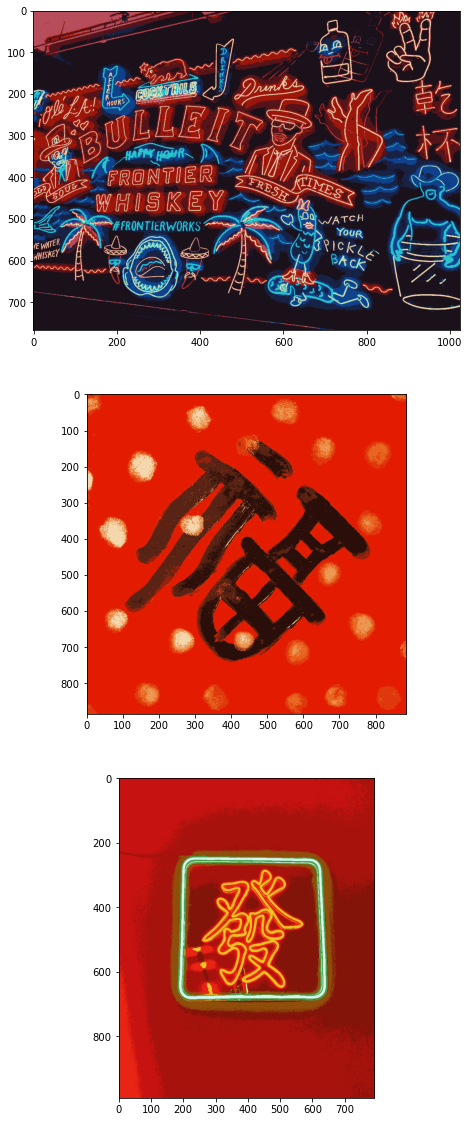

In [52]:
f, axarr = plt.subplots(3,1,figsize=(20,20)) 
axarr[0].imshow(new_im1)
axarr[1].imshow(new_im2)
axarr[2].imshow(new_im3)

In [53]:
new_im_data1 = np.array(new_im1)
new_im_data2 = np.array(new_im2)
new_im_data3 = np.array(new_im3)

In [54]:
np.unique(new_im_data1.reshape(-1, new_im_data1.shape[2]), axis=0)
np.unique(new_im_data2.reshape(-1, new_im_data2.shape[2]), axis=0)
np.unique(new_im_data3.reshape(-1, new_im_data3.shape[2]), axis=0)

array([[ 71, 160,  73],
       [131,  20,  10],
       [143,  78,  10],
       [167,  18,  13],
       [198,  18,  16],
       [216, 245, 239],
       [232,  36,  20],
       [238, 195,  32]], dtype=uint8)

In [55]:
new_im11, new_rgbs11 = convert_image_specific(im1, colors = [ [255, 255, 255], [255, 0, 0], [0,0,255], [0, 0, 0] ])
new_im22, new_rgbs22 = convert_image_specific(im2, colors = [ [255, 255, 255], [255, 0, 0], [0,0,255], [0, 0, 0] ])
new_im33, new_rgbs33 = convert_image_specific(im3, colors = [ [255, 255, 255], [255, 0, 0], [0,0,255], [0, 0, 0] ])

View the downgraded images results:

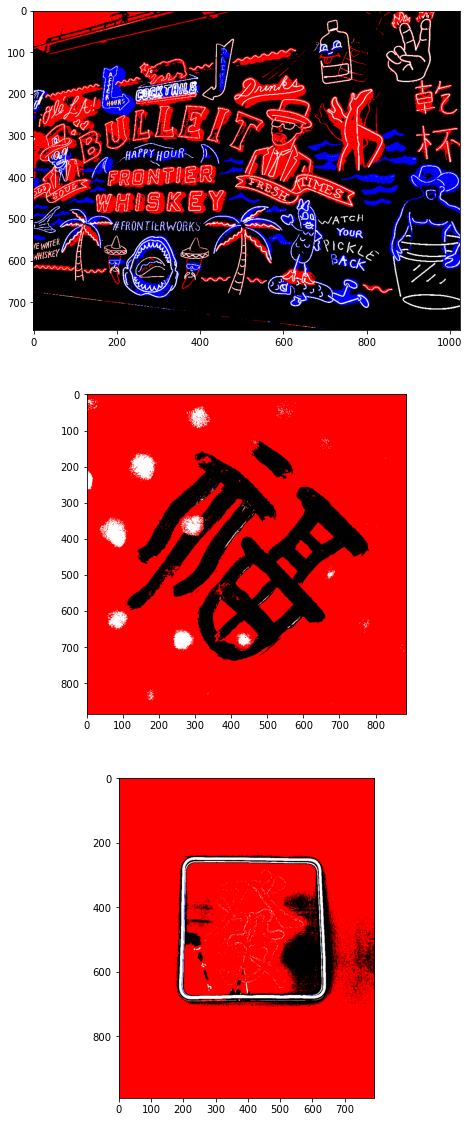

In [56]:
f, axarr = plt.subplots(3,1,figsize=(20,20)) 
axarr[0].imshow(new_im11)
axarr[1].imshow(new_im22)
axarr[2].imshow(new_im33)

In [73]:
im_data1 = np.array(new_im11)
im_data2 = np.array(new_im22)
im_data3 = np.array(new_im33)
print("image 1 shape: ",im_data1.shape)
print("image 2 shape: ",im_data2.shape)
print("image 3 shape: ",im_data3.shape)

image 1 shape:  (768, 1024, 3)
image 2 shape:  (886, 886, 3)
image 3 shape:  (991, 793, 3)


Create good masks for three images: 

* Note that in the three images selected, the alpha channel is missing. So Alpha masks are taken out. 

In [103]:
reds_good_mask = im_data1[:,:,0] == 255
greens_good_mask = im_data1[:,:,1] == 255
blues_good_mask = im_data1[:,:,2] == 255

reds_good_mask2 = im_data2[:,:,0] == 255
greens_good_mask2 = im_data2[:,:,1] == 255
blues_good_mask2 = im_data2[:,:,2] == 255

reds_good_mask3 = im_data3[:,:,0] == 255
greens_good_mask3 = im_data3[:,:,1] == 255
blues_good_mask3 = im_data3[:,:,2] == 255

#combine all good masks
pixel_mask_good = reds_good_mask & greens_good_mask & blues_good_mask
pixel_mask_good2 = reds_good_mask2 & greens_good_mask2 & blues_good_mask2
pixel_mask_good3 = reds_good_mask3 & greens_good_mask3 & blues_good_mask3

In [105]:
good_pixels = im_data1[pixel_mask_good]
good_pixels2 = im_data2[pixel_mask_good2]
good_pixels3 = im_data3[pixel_mask_good3]

In [106]:
im_data_masked_good = im_data1.copy() # first we make a copy of our original dataset to modify
im_data_masked_good[~pixel_mask_good] = 0 

im_data_masked_good2 = im_data2.copy() 
im_data_masked_good2[~pixel_mask_good2] = 0 

im_data_masked_good3 = im_data3.copy() 
im_data_masked_good3[~pixel_mask_good3] = 0 

Show the good pixels after applying masks:

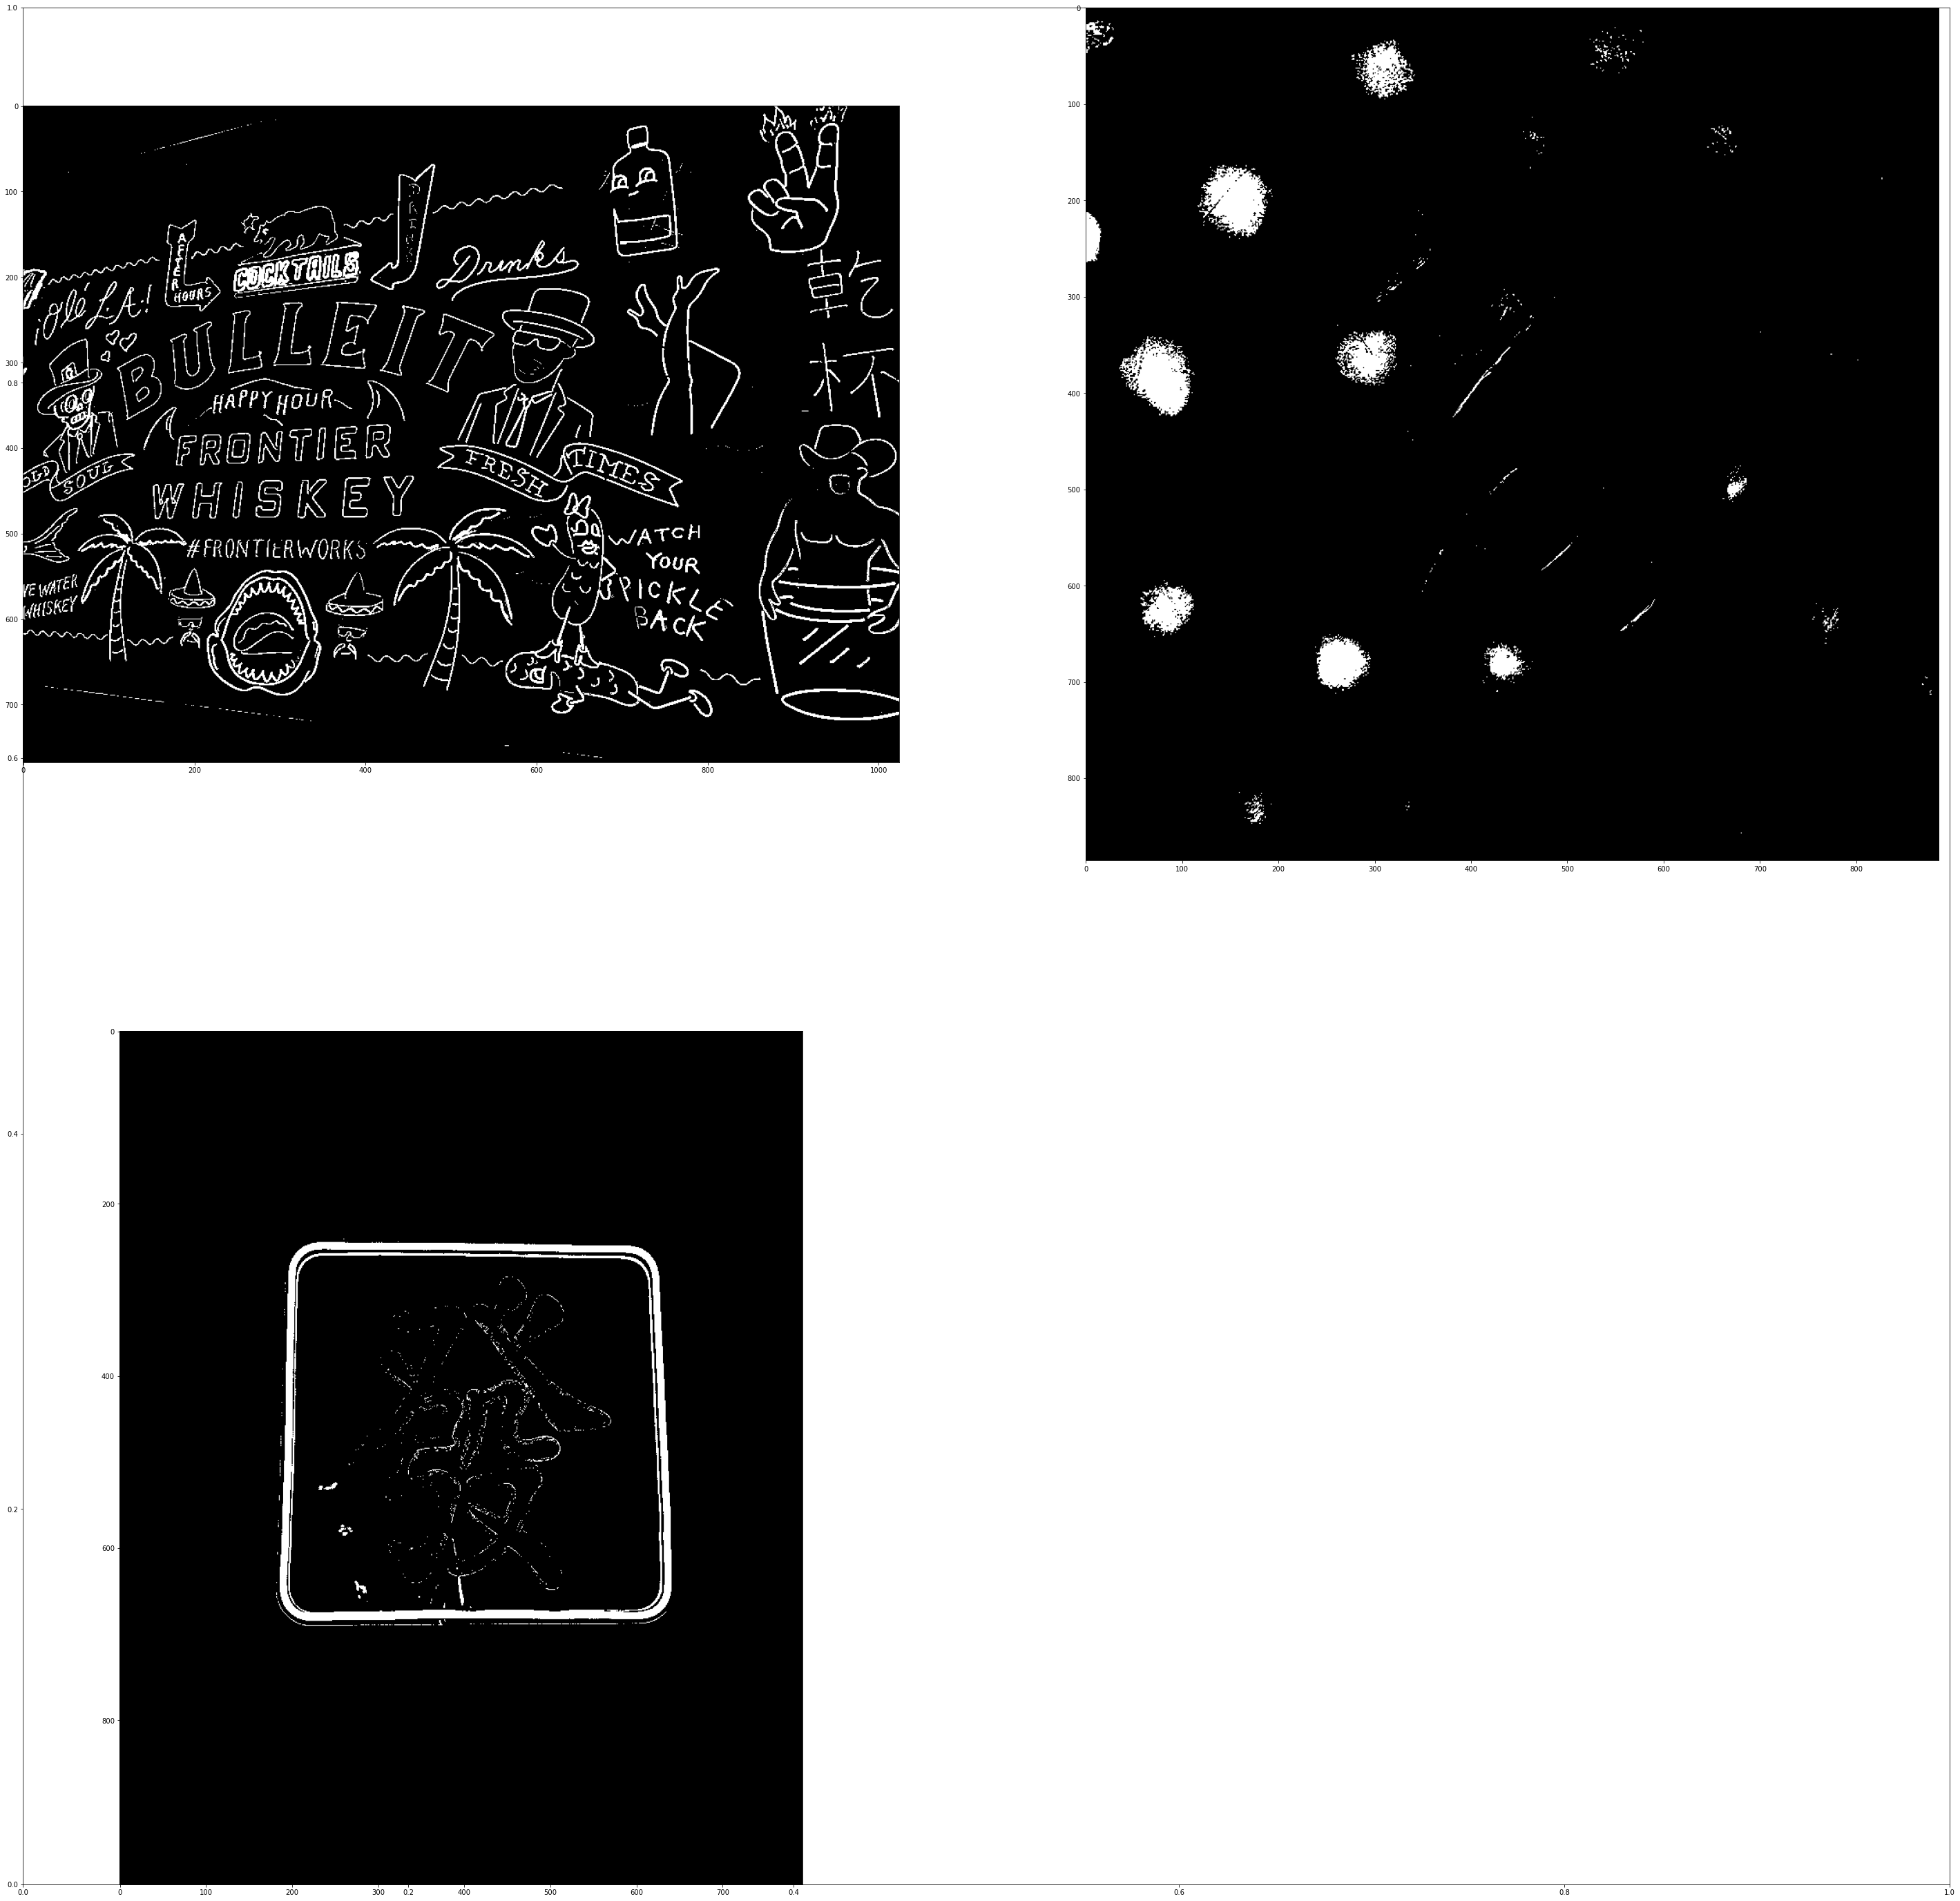

In [135]:
fig, ax = plt.subplots(figsize=(50,50)) 

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)

ax1.imshow(im_data1*0.0+0.5) # plot gray background as before
ax1.imshow(im_data_masked_good) # then we plot our Stitch image over the top

ax2.imshow(im_data2*0.0+0.5) # plot gray background as before
ax2.imshow(im_data_masked_good2)

ax3.imshow(im_data3*0.0+0.5) # plot gray background as before
ax3.imshow(im_data_masked_good3)

plt.show()

Calculations of good and bad pixels regarding total pixels in ratio:

In [124]:
ngood = len(good_pixels)
ngood2 = len(good_pixels2)
ngood3 = len(good_pixels3)

total = 768*1024
total2 = 886*886
total3 = 991*793

nbad = total - ngood
nbad2 = total2 - ngood2
nbad3 = total3 - ngood3

badness = nbad / total
badness2 = nbad2 / total2
badness3 = nbad3 / total3

goodness = ngood/  total
goodness2 = ngood2/  total2
goodness3 = ngood3/  total3

print("image 1: ",badness, goodness)
print("image 2: ",badness2, goodness2)
print("image 3: ",badness3, goodness3)

image 1:  0.9217046101888021 0.07829538981119792
image 2:  0.9785209096606862 0.02147909033931383
image 3:  0.9741952477721944 0.02580475222780561


#### Plot good and bad pixel proportions for all three images and compare the effects that pixel quality can have on image preferences. 

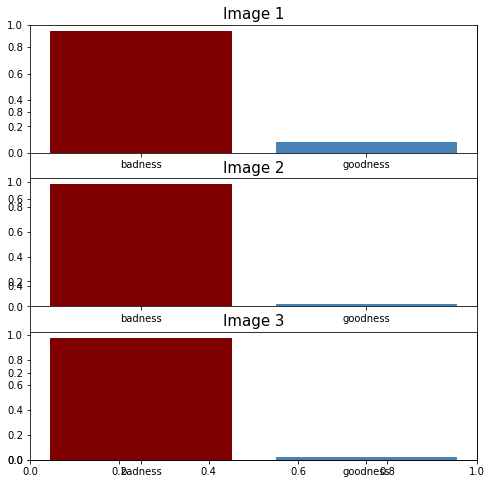

In [185]:
fig, ax = plt.subplots(figsize=(8,8))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
ax1.set_title("Image 1",fontsize=15)
ax2.set_title("Image 2",fontsize=15)
ax3.set_title("Image 3",fontsize=15)


labels = np.array(['badness', 'goodness'])
values = np.array([badness, goodness])
colors = np.array(['maroon', 'steelblue'])
myBarChart = ax1.bar(labels, values) 
for i in range(len(myBarChart)):
    myBarChart[i].set_color(colors[i])
    
labels2 = np.array(['badness', 'goodness'])
values2 = np.array([badness2, goodness2])
colors2 = np.array(['maroon', 'steelblue'])
myBarChart2 = ax2.bar(labels2, values2) 
for i in range(len(myBarChart2)):
    myBarChart2[i].set_color(colors2[i])

labels3 = np.array(['badness', 'goodness'])
values3 = np.array([badness3, goodness3])
colors3 = np.array(['maroon', 'steelblue'])
myBarChart3 = ax3.bar(labels3, values3) 
for i in range(len(myBarChart3)):
    myBarChart3[i].set_color(colors3[i])

plt.show()


#### Plot all colors in images to see whether diversities of colors have effects on preferences. 

Image 1:

In [101]:
number_of_pixels_of_a_color = []
color_labels = []
colors = []
for icolor,rgba in enumerate(np.unique(im_data1.reshape(-1, im_data1.shape[2]), axis=0)):
    #print(icolor, rgba)
    
    # mask each channel
    reds_mask = im_data1[:,:,0] == rgba[0]
    greens_mask = im_data1[:,:,1] == rgba[1]
    blues_mask = im_data1[:,:,2] == rgba[2]

    # combined mask
    pixel_mask = reds_mask & greens_mask & blues_mask
    
    # grab number of pixels
    this_color_pixels = im_data1[pixel_mask]
    number_of_pixels_of_a_color.append(len(this_color_pixels))
    # this could be done better...
    color_labels.append( 'Color #' + str(icolor) )
    
    colors.append( rgba/255 )

Image 2:

In [151]:
number_of_pixels_of_a_color2 = []
color_labels2 = []
colors2 = []
for icolor,rgba in enumerate(np.unique(im_data2.reshape(-1, im_data2.shape[2]), axis=0)):
    reds_mask2 = im_data2[:,:,0] == rgba[0]
    greens_mask2 = im_data2[:,:,1] == rgba[1]
    blues_mask2 = im_data2[:,:,2] == rgba[2]
    pixel_mask2 = reds_mask2 & greens_mask2 & blues_mask2
    this_color_pixels2 = im_data2[pixel_mask2]
    number_of_pixels_of_a_color2.append(len(this_color_pixels2))
    color_labels2.append( 'Color #' + str(icolor) )
    colors2.append( rgba/255 )

Image 3:

In [152]:
number_of_pixels_of_a_color3 = []
color_labels3 = []
colors3 = []
for icolor,rgba in enumerate(np.unique(im_data3.reshape(-1, im_data3.shape[2]), axis=0)):
    reds_mask3 = im_data3[:,:,0] == rgba[0]
    greens_mask3 = im_data3[:,:,1] == rgba[1]
    blues_mask3 = im_data3[:,:,2] == rgba[2]
    pixel_mask3 = reds_mask3 & greens_mask3 & blues_mask3
    this_color_pixels3 = im_data3[pixel_mask3]
    number_of_pixels_of_a_color3.append(len(this_color_pixels3))
    color_labels3.append( 'Color #' + str(icolor) )
    colors3.append( rgba/255 )

Plot all three results together to compare:

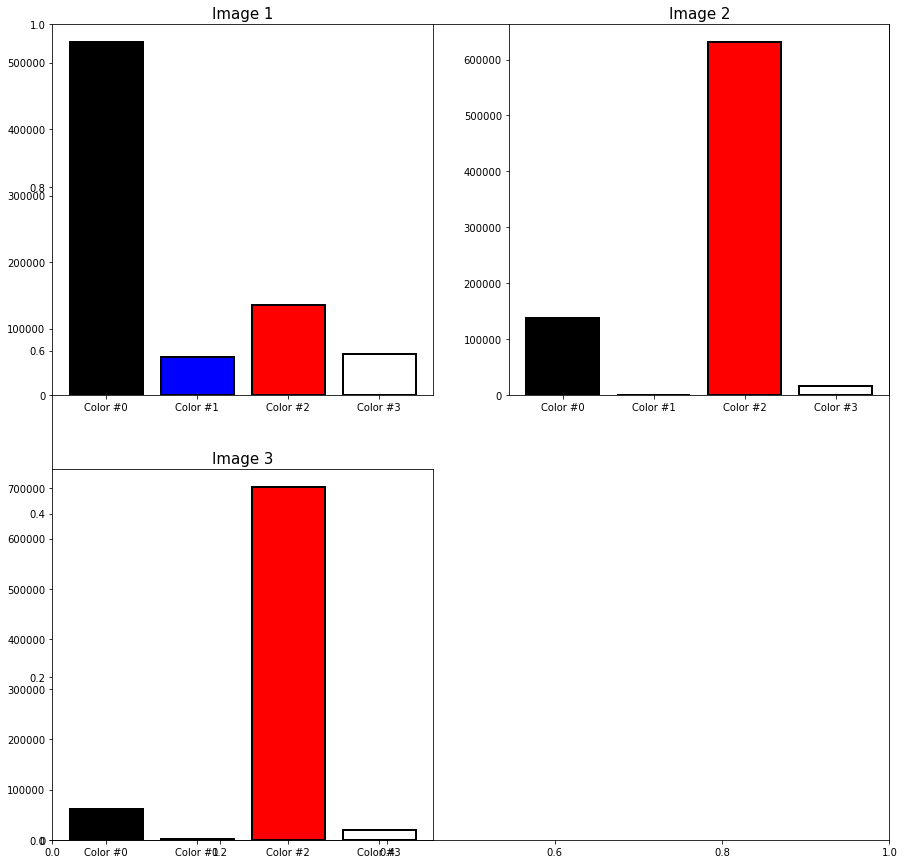

In [171]:
fig, ax = plt.subplots(figsize=(15,15))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax1.set_title("Image 1",fontsize=15)
ax2.set_title("Image 2",fontsize=15)
ax3.set_title("Image 3",fontsize=15)

myBarChart = ax1.bar(color_labels, number_of_pixels_of_a_color) 
# set colors for each bar individually
for i in range(len(myBarChart)):
    myBarChart[i].set_color(colors[i])
    myBarChart[i].set_edgecolor('black') # because one of our colors is white
    myBarChart[i].set_linewidth(2) # so we can see the outlines clearly
    
    
myBarChart2 = ax2.bar(color_labels2, number_of_pixels_of_a_color2) 
for i in range(len(myBarChart2)):
    myBarChart2[i].set_color(colors2[i])
    myBarChart2[i].set_edgecolor('black') 
    myBarChart2[i].set_linewidth(2) 

myBarChart3 = ax3.bar(color_labels3, number_of_pixels_of_a_color3) 
for i in range(len(myBarChart3)):
    myBarChart3[i].set_color(colors3[i])
    myBarChart3[i].set_edgecolor('black') 
    myBarChart3[i].set_linewidth(2)


plt.show()

## Conclusions

According to the good/bad pixels barchart results, it is clear that image 1 has significantly larger amount of good pixles than other two candicates. From the goodness/badness ratio,image 2 displays a slightly higher ratio of goodness than image 3. In addition, from the barcharts above, which analyze the color variation in images, we can notice a better spread of color diverty in image 1. Between image 2 and 3, image 2 has a higher portion of black color and this leads to a higher score of good pixel proportion.

My preference rank: image 1 > image 3> image 2.From above two aspects, my preference of image 1 makes sense because the higher performance on pixel quality and color diversity. However, the outline of the character in image 2 has better definition and results in a larger proportion of black color. In this way, the analysis favors image 2 than image 3. 

For my choices of pictures, the alpha channels are missing so that alpha masks are taken out. I chose side-by-side barchart for pixel quality analysis over stacked barchart because it directly shows not only the differences between good pixels and bed ones, but also compares across three images. 

### Question: 

Both of the color re-mappings presented in this notebook are not perfect.  What are some issues you can think of in how color is rebinned from a full color image into an image with less colors with the functions provided?

1. Re-mapping images with less colors can eliminate effects that other colors can have on the overall aesthetics. 
2. Details and color diversity can be reduced by showing certain number of colors. 
3. The livelyhood of images are reduced after rebinning colors. 